<a href="https://colab.research.google.com/github/AYA-NASH/NN_with_TensorFlow/blob/main/section3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Data

**1- Importing Food101 ZipFile**

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-26 12:07:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   282MB/s    in 0.4s    

2022-12-26 12:07:18 (282 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak
!ls pizza_steak/train
!ls pizza_steak/test

test  train
pizza  steak
pizza  steak


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# creating a function to generate a random image:
import matplotlib.pyplot as plt
import matplotlib.image as impimg
import random

def view_random_image(target_dir, target_class):
  # 1- set up the target directory:
  # target_dir, target_class are strings, target_dir could be called test and the target class could be "pizza",
  # so our target_folder will be test/pizza
  target_folder = target_dir + target_class
  # 2- Get random image path:
  rand_path = target_folder+'/' + random.choice(os.listdir(target_folder))

  # 3- read in the image and plot it:
  img = impimg.imread(rand_path)

  """
    step 2 & 3 can be done as :
    random_image = random.sample(os.listdir(target_folder), 1)
    rand_path =  random_image[0]
    img = impimg.imread(target_folder + "/" + random_image[0])
    
  """

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");


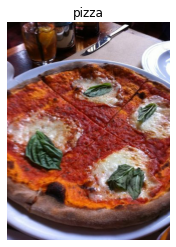

In [ ]:
view_random_image("pizza_steak/train/", "pizza")

**2- Pre-processing Data (i.e. Normalizing data)**

In [ ]:
# import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating train and test imageGenerator objects
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# setUp train and test paths:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# importing data from train/test directories and turn it to batches:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)
valid_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32, # number of images to process at a time 
                                             target_size=(224, 224), # convert all images to be 224 x 224
                                             class_mode="binary", # type of problem we're working on
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


###Building the Model:

In [ ]:
import tensorflow as tf

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 213ms/step - loss: 0.5461 - accuracy: 0.7193 - val_loss: 0.4161 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4205 - accuracy: 0.8053 - val_loss: 0.3465 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4090 - accuracy: 0.8220 - val_loss: 0.3792 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3952 - accuracy: 0.8327 - val_loss: 0.4115 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3828 - accuracy: 0.8320 - val_loss: 0.4279 - val_accuracy: 0.7700


**Visualizing Performance of our model:**

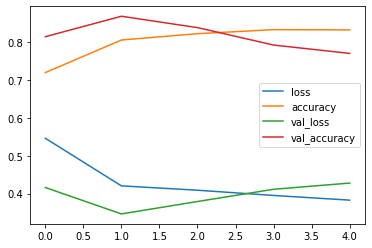

In [ ]:
import pandas as pd

pd.DataFrame(history_1.history).plot()

**Separating loss graph from accuracy graph using a helper function:**

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(loss))

  # plotting loss
  plt.plot(epochs, loss, label = "Training Loss")
  plt.plot(epochs, val_loss, label = "Validation loss")  
  plt.legend();

  # plotting Accuracy:
  plt.figure()
  plt.plot(epochs, accuracy, label = "Training Accuracy")
  plt.plot(epochs, val_accuracy, label = "Validation Accuracy")  
  plt.legend();

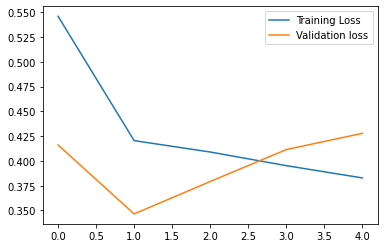

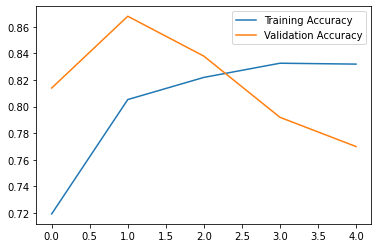

In [ ]:
plot_loss_curves(history_1)

##Breaking Dowwn the CNN

**The baseline model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating train and test imageGenerator objects
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# setUp train and test paths:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# importing data from train/test directories and turn it to batches:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)
valid_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32, # number of images to process at a time 
                                             target_size=(224, 224), # convert all images to be 224 x 224
                                             class_mode="binary", # type of problem we're working on
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)

model_4 = Sequential([
    Conv2D(10,3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),

    Conv2D(10,3, activation = "relu"),
    MaxPool2D(2),

    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 211ms/step - loss: 0.5989 - accuracy: 0.6873 - val_loss: 0.4926 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4728 - accuracy: 0.7900 - val_loss: 0.3770 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4334 - accuracy: 0.7933 - val_loss: 0.3625 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4080 - accuracy: 0.8193 - val_loss: 0.3462 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3711 - accuracy: 0.8407 - val_loss: 0.3184 - val_accuracy: 0.8840


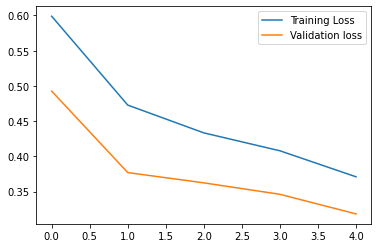

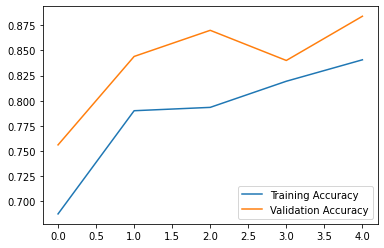

In [ ]:
plot_loss_curves(history_4)

**using the same data with Augmented Data**

In [ ]:
# data augmentaion is applied on the training set:

train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 20,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True)

# importing data from train/test directories and turn it to batches:
train_data_augmented = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               )

Found 1500 images belonging to 2 classes.


In [ ]:
augmented_images , labels = train_data_augmented.next()

In [ ]:
# Use the model with augmented data:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(10,3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),

    Conv2D(10,3, activation = "relu"),
    MaxPool2D(2),

    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation = "sigmoid")
])


model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 0.6218 - accuracy: 0.6540 - val_loss: 0.4955 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4939 - accuracy: 0.7687 - val_loss: 0.4159 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4315 - accuracy: 0.8040 - val_loss: 0.3793 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4039 - accuracy: 0.8227 - val_loss: 0.3776 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3688 - accuracy: 0.8320 - val_loss: 0.3371 - val_accuracy: 0.8640


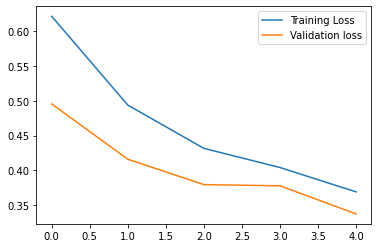

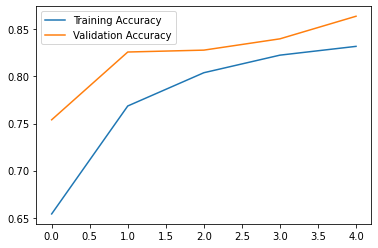

In [ ]:
plot_loss_curves(history_5)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-12-26 12:10:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-12-26 12:10:00 (49.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



**The Custom Data must be pre-processed to be in the same format that model learned on it**

In [ ]:
# Define a helper function to load and preprocess the data:
def  load_and_prep_image(filename , img_shape = 224 ):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img /= 255.

  return img

In [ ]:
custom_img = load_and_prep_image("03-pizza-dad.jpeg")

custom_img

In [ ]:
model_1.predict(tf.expand_dims(custom_img , axis = 0))

1/1 [==============================] - 0s 201ms/step


array([[0.6712022]], dtype=float32)

In [ ]:
model_4.predict(tf.expand_dims(custom_img , axis = 0))

1/1 [==============================] - 0s 89ms/step


array([[0.3715491]], dtype=float32)

In [ ]:
class_names = ['pizza','steak']

In [ ]:
prediction = model_1.predict(tf.expand_dims(custom_img , axis = 0))

class_names[int(tf.round(prediction))]

1/1 [==============================] - 0s 16ms/step


'steak'

In [ ]:
# Creating a function to use a model and a custom image to visualize the prediction:
def pred_and_plot(model, filename, classes):
  # use the file name to extract the image as a tensor to work with:
  img = load_and_prep_image(filename)
  # img = tf.expand_dims(img , axis = 0)
  # run the model on img:
  pred = model.predict(tf.expand_dims(img , axis = 0))
  # get the class name of img:
  name = classes[int(tf.round(pred))]

  # plot the img with its predicted title:
  plt.imshow(img)
  plt.title(name)
  plt.axis(False);

1/1 [==============================] - 0s 17ms/step


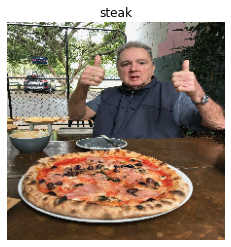

In [ ]:
file_name = "03-pizza-dad.jpeg"
pred_and_plot(model_1, file_name, class_names)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2022-12-26 12:10:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.05s   

2022-12-26 12:10:01 (65.4 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]



1/1 [==============================] - 0s 18ms/step


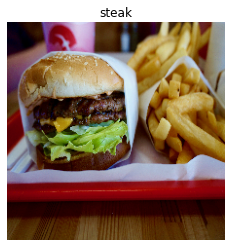

In [ ]:
pred_and_plot(model_1, "03-hamburger.jpeg", class_names)

##CNN Multiclass-Classification

**1- Getting Data**

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2022-12-26 12:25:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   202MB/s    in 2.4s    

2022-12-26 12:25:32 (202 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

